# Signaux de base

Nous allons voir les signaux et systèmes de base utilisés pour décomposer un signal/système plus complexe.

On note $L$ l'espace des fonctions $\mathbb{R}\to\mathbb{R}$ voire $\mathbb{R}\to\mathbb{C}$. 


  
Lorsque l'on veut parler par exemple de la fonction $t \mapsto t^2$ (et non $t^2$ qui est un réel et qui suppose que $t$ est défini) sans alourdir l'écriture on écrira $\bullet^2$ qui montre clairement que la variable peut être autre chose que $t$.

Un système est représenté par un **opérateur** mathématique, c-à-d une application qui transforme une application en application !
En effet un système transforme un signal d'entrée en un signal de sortie (et non pas des réels !). Il est important de différentier :
  - $f$ : une fonction qui transforme un réel en un réel
  - $T\{f\}$ ou $T[f]$ : la fonction obtenue en appliquant un opérateur $T$ à une fonction $f$ 
  - $T\{f\}(t)$ : l'évaluation à l'instant $t$ de la fonction $T\{f\}$ obtenue en appliquant l'opérateur $T$ à la fonction $f$

>   En bref les () pour les fonctions et les {} ou [] pour les opérateurs transformants des fonctions en fonctions.

## Opérateur de retard

Un opérateur utile 

# Chaine d'intégrateurs

## Echelon unité - Unit step - u 
Le premier signal de base est l'échelon unité ou échelon de Heaviside noté $u$ (parfois $h$ en hommage à Heaviside)qui est de $\mathbb{R}\to\mathbb{R}$.

Il vaut 1 lorsque la variable est strictement positive, 0 lorsqu'elle est strictement négative. Il n'y a pas de convention unanime pour donner une valeur en 0 où la fonction est discontinue.

Définissons cette fonction avec MAtlab/Octave pour l'afficher :

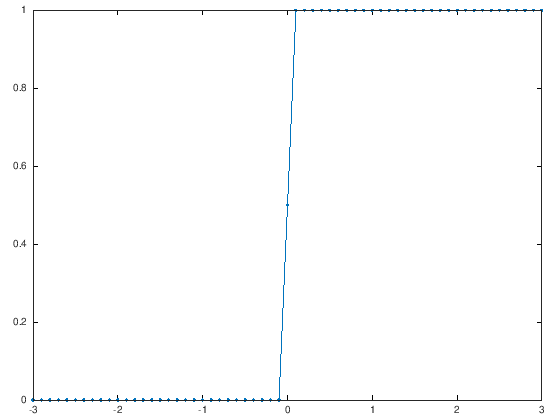

In [9]:
utiles ; %importe les fonctions u,r,a et les opérateurs
Te=10*dt ; %petit intervalle de temps le dt de Rieman ou la période d'échantillonnage
t = -30*Te:Te:30*Te ; % tableau de valeurs valant [-3, -2.9, ... , 2.9, 3]
plot(t,u(t),'.-')

## Rampe unitée - Unit ramp - r

L'intégrale de l'échelon qui s'annule pour t<0 de ce signal est la "fonction rampe" (*ramp* en anglais) notée $r$.

On peut la définir comme la fonction $t\mapsto t.u(t)$ où l'échelon de Heaviside sert comme souvent à annuler la fonction pour les temps négatifs (on parle alors de *fonction causale*)

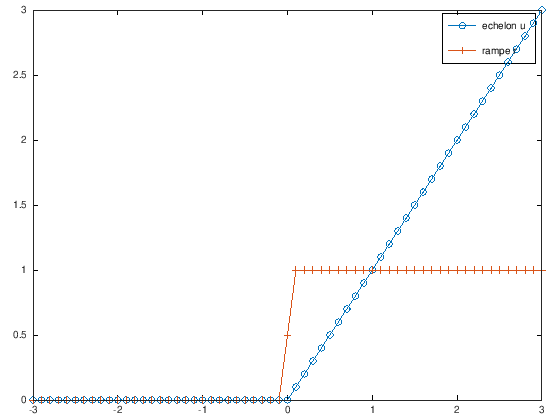

In [10]:
plot(t,r(t),'o-',t,u(t),'+-')
legend(['echelon u';'rampe r'])

On peut utiliser le calcul numérique pour approcher la valeur d'une intégrale.

Ici on utilise l'opérateur d'intégration numérique `OpI` qui prend en argument une fonction et renvoie la fonction primitive qui s'annule en 0 (et avant)

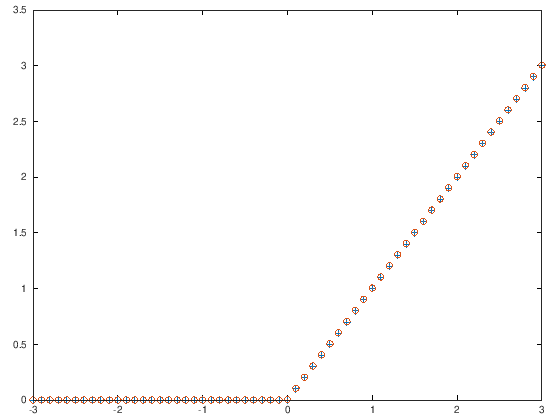

In [11]:
plot(t,r(t),'+', t,OpI(u)(t),'o')

## Accélération unité - Jerk

On peut ainsi rajouter la rampe d'accélération (*jerk function* parfois en anglais) qui est issue de l'intégrale d'une rampe.

On peut la définir comme l'intégrale de r qui s'annule en 0 : $t\mapsto \frac{1}{2}.t^2.u(t)$.

Elle est utilisée en robotique et physique et automatique car liée à des trajectoires à accélération constante. Cette fonction n'as pas de nom usuel dans la littérature, on prendra ici $a$ pour "accélération". 

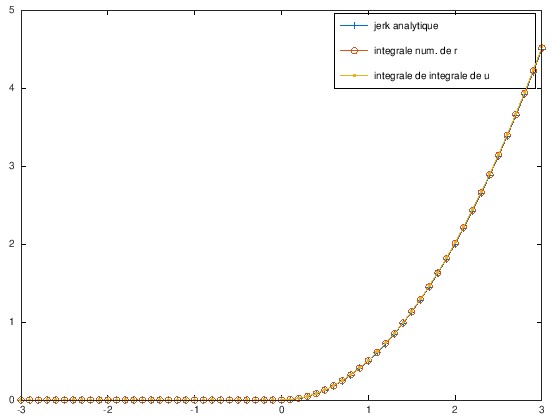

In [12]:
plot(t,a(t),'+-',t,OpI(r)(t),'o-',t,OpI(OpI(u))(t),'.-')
legend(['jerk analytique';'integrale num. de r';'integrale de integrale de u '])

# L'opérateur dérivée p et intégrale $p^{-1}$

On définit l'opérateur dérivée par $p$ et on admet pour le moment que cet opérateur à un inverse qui est l'intégrale qui s'annule en 0.
Dans le cas de fonctions causales $f$ (nulle pour t<0), la primitive qui s'annule en zéro $F$ est aussi causale et on admet que sa dérivée de la primitive est bien $f$ : 

$\int f' \quad = t \mapsto \int\limits_0^t f'(\nu) d\nu \quad = t \mapsto f(t) - f(0^+)  \quad = f$

et

$F' \quad = t\mapsto \left(\int\limits_0^t f(\nu) d\nu \right)'  \quad = \left( F(t) - F(0) \right)' \quad =  f $ 

Ce qui en terme d'opérateur s'exprime par 

$p[F] = p[p^{-1}[f]] = p \circ p^{-1} [f] = Id[f] = f$

Par exemple appliquons cela à la fonction rampe. Dans `utiles` l'opérateur dérivée est défini comme `OpD` et l'opérateur primitive `OpI`

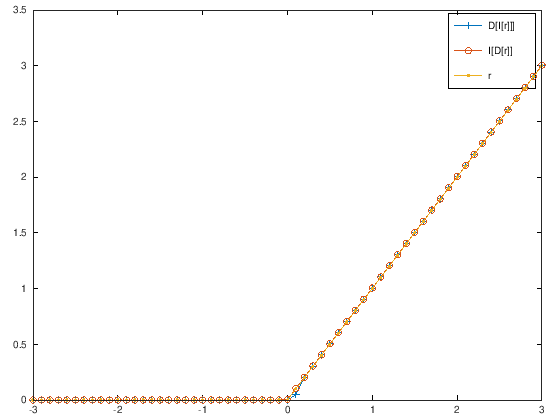

In [13]:
plot(t,OpD(OpI(r))(t),'+-',
     t,OpI(OpD(r))(t),'o-',
     t,r(t),'.-'
     )
legend(["D[I[r]]]";"I[D[r]]";"r"])

Remarquons que la primitive est bien l'opérateur inverse de la dérivée si la fonction $f$ est telle que $f(0)=0$ et $f(0^+)=0$ : autrement dit la fonction doit être nulle et continue à droite pour $t=0$.

Ce n'est pas le cas de la fonction échelon $u$ qui a une discontinuité à droite si on considère $u(0)=0$ (car $u(0^+)=1$) ou bien $u(0)=1$ si on prolonge par continuité à droite : 

> $p\circ p^{-1} = Id$ cela ne marche pas pour les discontinuités ! 

Regardons la dérivée de l'échelon :

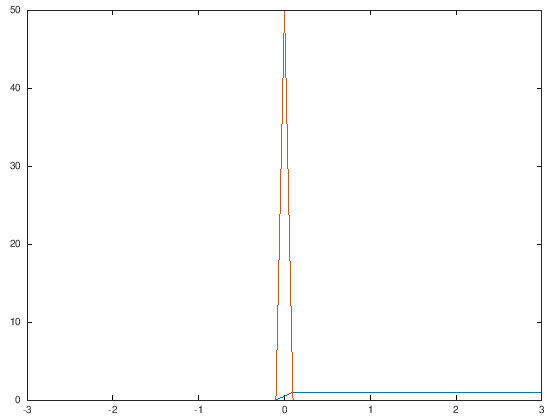

In [14]:
plot(t,u(t), t,OpD(u)(t))

La dérivée de l'échelon est donc nulle partout et infinie en $0$ !

En effet, l'échelon est représenté de manière numérique de manière imparfaite.
Zoomons dans le temps pour voir ce qui se passe en 0.

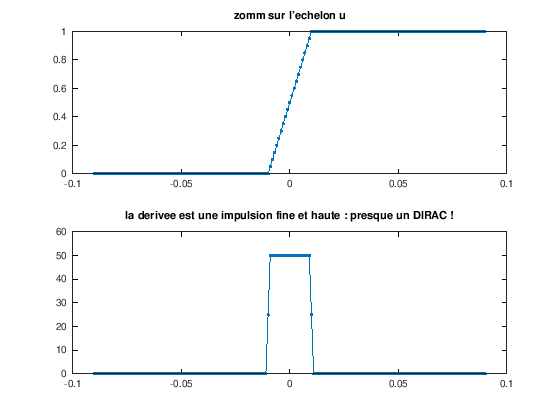

In [15]:
tzoom = -9*dt:dt/10:9*dt; 
subplot(211); plot(tzoom, u(tzoom),'.-') ; 
title("zomm sur l'echelon u")
subplot(212); plot(tzoom,OpD_Dt(u)(tzoom),'.-') ;
title("la derivee est une impulsion fine et haute : presque un DIRAC !")